In [2]:
%matplotlib inline  

# IMPORTACIÓN DE LAS BIBLIOTECAS QUE NECESITAMOS USAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from scipy import signal

In [4]:
# IMPORTACIÓN DE LOS DATOS DESDE UN ARCHIVO DE EXCEL
directorio = 'datos_oscilaciones/'
nombrearchivo='ejemplo_dinamico.csv'
data = pd.read_csv(directorio + nombrearchivo,header=None)
#t = data[0]
#x = data[1]
#data
t = np.asarray(data[0])
x = np.asarray(data[1])
x

array([ 0.5443686,  0.5478753,  0.565409 , ...,  1.890955 ,  1.901475 ,
        1.922516 ])

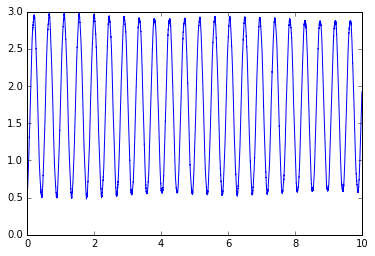

In [5]:
plt.plot(t, x)
plt.show()

In [9]:
# En este caso, este algoritmo pierde picos
nventana = 50
extrema = signal.argrelmax(x,order=nventana) # Existen otros metodos, por ejemplo en https://docs.scipy.org/doc/scipy/reference/signal.html
len(extrema[0])

13

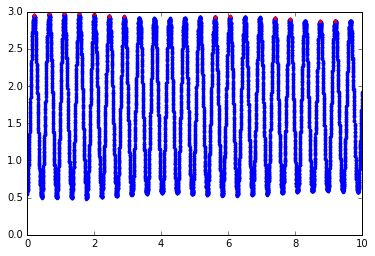

In [10]:
# Lo grafico para ver
plt.plot(t, x,'b.')
plt.plot(t[extrema], x[extrema],'r.')
plt.show()

In [11]:
# Este funciona mejor!!
extrema = signal.find_peaks_cwt(x, np.arange(30,100)) 
len(extrema)

23

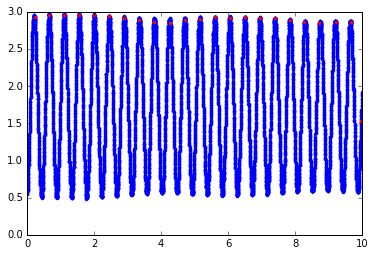

In [12]:
plt.plot(t, x,'b.')
plt.plot(t[extrema], x[extrema],'r.')
plt.show()

In [14]:
ti = t[extrema]
dt = ti[1:len(ti)]-ti[0:(len(ti)-1)]
w = 2*np.pi/dt
wprom = np.mean(w)
werr = np.std(w,ddof=1)/np.sqrt(len(w))
print('Frecuencia angular promedio (mean + s.e.m.) = %0.2f + %0.2f' %(wprom, werr))

Frecuencia angular promedio (mean + s.e.m.) = 14.27 + 0.30
